In [69]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from openpyxl import load_workbook

## Read inputs

In [54]:
path = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\raw\H2_supply_route_assessment.xlsx'
path_plt = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\Plots'
path_csv = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\processed'

In [55]:
pipe = pd.read_excel(path, sheet_name='Pipeline Transport', decimal=',', index_col=0)
pipe

,Parameter,Reference,2020
ID,,,
Discount rate [%],0.05,NaN,NaN
Offshore Capex cost factor,1.7,EHB 2022; IRENA 2022,NaN
Pipeline Opex [€/a as % of Capex],0.017,NaN,NaN
Compressor Opex [€/a as % of Capex],0.009,NaN,NaN
Low - Compression capacity @ 48inch [MW_el/1000km],190,EHB 2020,NaN
...,...,...,...
High - retrofit Offshore (EHB 2022) Capex Compression [€/kg/1000km],1.06,NaN,NaN
NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN


In [56]:
GHG =  pd.read_excel(path, sheet_name='GHG Footprint', decimal=',', index_col=0)
GHG

,Value,Ref,1990,1991,1992,1993,1994,1995,1996,1997,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
GHG intensity of electricity generation [g CO2eq/kWh] - Germany,NaN,EEA 2022,652.0,656.0,628.0,631.0,626.0,610.0,580.0,566.0,...,62.592000,46.94400,31.296000,15.648000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00
GHG intensity of electricity generation [g CO2eq/kWh] - Norway,NaN,Our world in Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.783673,6.91882,6.053968,5.189115,4.324263,3.45941,2.594558,1.729705,0.864853,0.00
Grey hydrogen emissions [g CO2/MJ H2] - Norway,96.77,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grey hydrogen emissions [kg CO2/kg H2] - Norway,11.6124,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blue hydrogen emissions [g CO2/MJ H2] - Norway,NaN,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.499000,24.61800,23.737000,22.856000,21.975000,21.09400,20.213000,19.332000,18.451000,17.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hydrogen leakage,Predicted Emission Confidence level,Ref,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrolytic H2 production [% of produced H2],0.092,DOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrolytic H2 production [% of produced H2] w/ recombination,0.0052,DOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
tea_lh2 = pd.read_excel(path, sheet_name='LH2', decimal=',', index_col=0)
tea_lh2

,Ref,LH2,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Properties,,,,,,,,,,,,,,,,,,,,,
Properties - Gas density [kg/m3],BOG 2020,71.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [MJ/kg],BOG 2020,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/m3],https://www.rechargenews.com/energy-transitio...,2350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - Boiling point at 1 Bar [°C],NaN,-253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"CAPEX ($/kW-H2), incl. Util.",EWI PTX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"OPEX ($/kW-H2/a), incl. Util.",EWI PTX,NaN,57.69591,57.118951,56.541992,55.965033,55.388074,54.811115,54.234156,53.657197,...,37.646582,36.348424,35.050266,33.752108,32.45395,31.155792,29.857634,28.559476,27.261318,25.96316
Electricity use (kWh/kWh-H2,EWI PTX,0.01,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.01000,0.010000,0.010000,0.010000,0.010000,0.01000


In [58]:
tea_lnh3 = pd.read_excel(path, sheet_name='LNH3', decimal=',', index_col=0)
tea_lnh3

,Ref,NH3,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Properties,,,,,,,,,,,,,,,,,,,,,
Properties - Gas density [kg/m3],NaN,682.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [MJ/kg] [],BOG 2020,18.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,5.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/m3],https://www.rechargenews.com/energy-transitio...,3730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - Boiling point at 1 Bar [°C],NaN,-33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reconversion - Efficiency [% LHV],IRENA 2022,NaN,0.98,0.980,0.98,0.980,0.98,0.980,0.98,0.980,...,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
Reconversion - Electricity consumption opt. [kWh/kg H2],IRENA 2022,NaN,2.75,2.675,2.6,2.525,2.45,2.375,2.30,2.225,...,1.20,1.15,1.10,1.05,1.00,0.95,0.90,0.85,0.80,0.75
Reconversion - Electricity consumption pess. [kWh/kg H2],IRENA 2022,NaN,2.75,2.675,2.6,2.525,2.45,2.375,2.30,2.225,...,1.20,1.15,1.10,1.05,1.00,0.95,0.90,0.85,0.80,0.75


In [59]:
tra_d = pd.read_excel(path, sheet_name='Transport Distances', decimal=',')
tra_d

,Origin_Country,Destination_Country,sea distance (km),onshore distance (km),offshore distance (km),Starting point
0,United Arab Emirates,Germany,12443.10,NaN,NaN,NaN
1,Angola,Germany,9809.65,NaN,NaN,NaN
2,Argentina,Germany,14063.90,NaN,NaN,NaN
3,Austria,Germany,6005.96,500.0,0.0,NaN
4,Australia,Germany,21212.10,NaN,NaN,NaN
...,...,...,...,...,...,...
955,Philippines,China,1782.35,NaN,NaN,NaN
956,Iceland,China,20454.60,NaN,NaN,NaN
957,Papua New Guinea,China,6298.52,NaN,NaN,NaN
958,Cameroon,China,19717.70,NaN,NaN,NaN


In [60]:
# Onshore pipeline distance between two countries [km]
d_on = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['onshore distance (km)'].values)
d_on

300.0

In [61]:
# Offshore pipeline distance between two countries [km]
d_off = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['offshore distance (km)'].values)
d_off

650.0

In [62]:
# Compression capacity in [MWel/1000km]
capa_comp = float(pipe.loc['Medium - Compression capacity @ 48inch [MW_el/1000km]']['Parameter'])
capa_comp

260.0

In [63]:
# Utilisation of the pipeline in %
pipe_use = float(pipe.loc['Pipeline load factor [%]']['Parameter'])
pipe_use

0.75

In [64]:
#Capacity at full load factor [kg H2/a]
capa_pipe = float(pipe.loc['Capacity at full load factor [kg H2/a]']['Parameter'])
capa_pipe

3416741674.167417

# Pipeline transport

Compression capacity in [MWel/1000km]
Utilisation of the pipeline in %
8760 h/a
Capacity at full load factor [kg H2/a]
Transport distance in [km]


In [65]:
# Calc. energy use for compression [kWh/kg_H2]
en_comp = capa_comp * 1000 * pipe_use * 8760 / capa_pipe / 1000 * (d_on + d_off)
en_comp

0.4749525

Energy use per kg H2 delivered times emission factor for energy use.
en_comp = Total energy use for compression [kWh/kg H2]
EF_y_n = Emission factor of used energy in year y and country n [g CO2eq/kWh]

In [66]:
def Pipeline_emissions():

    result = en_comp * EF_y_n
    return result

Calc. pipeline emissions over time

Using grid electricity for compression.
Compressor station for subsea pipelines in exporting country.
Emission factor for grid electricity in year y and country n [g CO2eq/kWh]
Energy use for compression in [kWh/kg H2]

In [67]:
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['Pipeline_emissions'])
result.index.name = 'Years'

for year in years:

    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.Pipeline_emissions.loc[year] = Pipeline_emissions()

result

,Pipeline_emissions
Years,
2025,10.269097
2026,9.858333
2027,9.447569
2028,9.036805
2029,8.626041
2030,8.215277
2031,7.804513
2032,7.39375
2033,6.982986


In [68]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

C:\Users\REUTER\AppData\Local\Temp\ipykernel_18464\986526507.py:4: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  writer.book = book


AttributeError: can't set attribute 'sheets'

In [ ]:
Pipeline_emissions = result

## Sensitivity

In [ ]:
#EF_y_n = 118

In [165]:
EF_sensi = np.arange(0,301,20)
sensitivity = []
def Pipeline_emissions_sensi_EF():

    for EF_y_n in EF_sensi:

        result = en_comp * EF_y_n

        sensitivity.append(result)

    return result

In [166]:
Pipeline_emissions_sensi_EF()

142.48575

In [167]:
Pipeline_emissions_sensi_EF = pd.DataFrame(sensitivity, EF_sensi, columns=['Pipeline transport emission [g CO2eq/kg H2]'])
Pipeline_emissions_sensi_EF.index.name = 'Electricity emission factor [g CO2eq/kWh]'
Pipeline_emissions_sensi_EF

,Pipeline transport emission [g CO2eq/kg H2]
Electricity emission factor [g CO2eq/kWh],
0,0.00000
20,9.49905
40,18.99810
60,28.49715
80,37.99620
100,47.49525
120,56.99430
140,66.49335
160,75.99240


In [73]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'pipe_EF_sensi.csv')
Pipeline_emissions_sensi_EF.to_csv(output_file, sep=';')

Plot emission breakdown for pipeline transport

# LH2 transport

Liquefaction energy use

Electricity use for liquefaction in [kWh/kg H2]
Emission factor for grid electricity in year y and country n [g CO2eq/kWh]


## Liquefaction

In [93]:
def Conversion_emissions():
    result = el_liq_y * EF_y_n
    return result

In [94]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Conversion_emissions'])
for year in years:
    el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.LH2_Conversion_emissions.loc[year] = Conversion_emissions()

result

,LH2_Conversion_emissions
2025,183.78116
2026,174.354267
2027,165.100346
2028,156.019394
2029,147.111413
2030,138.376403
2031,129.814363
2032,121.425293
2033,113.209195
2034,105.166066


In [95]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

C:\Users\REUTER\AppData\Local\Temp\ipykernel_18464\986526507.py:4: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  writer.book = book


AttributeError: can't set attribute 'sheets'

In [96]:
LH2_Conversion_emissions = result

In [97]:
output_file = os.path.join(path_csv,'LH2_Conversion_emissions.csv')
result.to_csv(output_file, sep = ';')

## Export terminal

In [78]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et = float(tea_lh2.loc['Export Terminal - Electricity use [kWh/kgH2]']['LH2'])
el_et

0.61

In [79]:
el_reliq = float(tea_lh2.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg H2/day]']['LH2'])
el_reliq

0.1

In [80]:
# Average storage time in the export terminal tanks in days
t_et = float(tea_lh2.loc['Export Terminal - Storage length per load [Days]']['LH2'])
t_et

7.0

In [81]:
def ET_emissions():
    result = (el_et + el_reliq * t_et) * EF_y_n
    return result

In [82]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Export_terminal_emissions'])
result.index.name = 'Years'

for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.LH2_Export_terminal_emissions.loc[year] = ET_emissions()

result

,LH2_Export_terminal_emissions
Years,
2025,28.32392
2026,27.190963
2027,26.058006
2028,24.92505
2029,23.792093
2030,22.659136
2031,21.526179
2032,20.393222
2033,19.260266


In [83]:
LH2_Export_terminal_emissions = result

In [84]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

C:\Users\REUTER\AppData\Local\Temp\ipykernel_18464\986526507.py:4: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  writer.book = book


AttributeError: can't set attribute 'sheets'

In [85]:
output_file = os.path.join(path_csv,'LH2_Export_terminal_emissions.csv')
result.to_csv(output_file, sep = ';')

## Shipping

Calc. emission factor for cargo/fuel

Cost of transported hydrogen in [$/kg_h2] in year y


In [87]:
%store -r min_prod_cost
min_prod_cost

,Minimal_production_costs,Technology,Emissions
Years,,,
2025,2.491992,Green,0.00000
2026,2.373447,Blue,4.64568
2027,2.155720,Blue,4.53996
2028,1.821652,Blue,4.43424
2029,1.831196,Blue,4.32852
2030,1.839387,Blue,4.22280
2031,1.856517,Blue,4.11708
2032,1.872223,Blue,4.01136
2033,1.886502,Blue,3.90564


In [88]:
# Emissions of transported hydrogen carrier in [g CO2eq/kg_H2] in year y
H2_emissions = (min_prod_cost.loc[::]['Emissions']).apply(pd.to_numeric) * 1000
Con_emissions = (LH2_Conversion_emissions.loc[::]['LH2_Conversion_emissions']).apply(pd.to_numeric)
ET_emissions = (LH2_Export_terminal_emissions.loc[::]['LH2_Export_terminal_emissions']).apply(pd.to_numeric)

In [89]:
# Emission of cargo in [g CO2eq/kg_H2]
LH2_cargo_emissions = (H2_emissions + Con_emissions + ET_emissions).to_frame('LH2_cargo_emissions')
LH2_cargo_emissions

,LH2_cargo_emissions
Years,
2025,212.105080
2026,4847.225231
2027,4731.118352
2028,4615.184444
2029,4499.423506
2030,4383.835539
2031,4268.420542
2032,4153.178516
2033,4038.109460


In [98]:
output_file = os.path.join(path_csv,'LH2_cargo_emissions.csv')
result.to_csv(output_file, sep = ';')

In [99]:
# Boil-off when shipping in [%/day] to [%/hour]
bog_ship = float(tea_lh2.loc['Shipping - Boil off opt. [%/day]']['LH2']) / 24
bog_ship

8.333333333333333e-05

In [100]:
# Fuel consumption of a ship in [kg_h2/t/km]
f_ship = float(tea_lh2.loc['Shipping - Fuel use [kg H2/t/km]']['LH2']) / 1000
f_ship

1.1265151515151516e-06

In [101]:
# Distance between countries via ship in [km]
d_sea = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')][
                  'sea distance (km)'].values)
d_sea

602.403

In [102]:
# Ship speed in [km/h]
v_ship = float(tea_lh2.loc['Shipping - Ship speed [km/h]']['LH2'])
v_ship

30.0

In [ ]:
#d_sea = 10000

Calc. LH2 shipping emissions

In [ ]:
def calculate_ship_emissions():
    result = 1/(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea)) \
             + (bog_ship * d_sea/v_ship + f_ship * d_sea) * LH2_cargo_ghg

    return result

In [ ]:
# Calculation of shipping emissions [g CO2eq/kg_h2] from 2025 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Shipping_emissions'])
result.index.name = 'Years'

for year in years:

    LH2_cargo_ghg = float(LH2_cargo_emissions.loc[year]['LH2_cargo_emissions'])

    # calculate emissions of specific year
    result.LH2_Shipping_emissions.loc[year] = calculate_ship_emissions()

result

In [ ]:
LH2_Shipping_emissions = result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
output_file = os.path.join(path_csv,'LH2_Shipping_emissions.csv')
result.to_csv(output_file, sep = ';')

## Import terminal


In [103]:
# Electricity consumption for the import terminal [kWh/kg_h2]
el_it = float(tea_lh2.loc['Import Terminal - Electricity use [kWh/kg H2]']['LH2'])
el_it

0.2

In [104]:
# Electricity consumption to reliquefy BOG [kWh/kg_h2]
el_reliq = float(tea_lh2.loc['Import Terminal - Energy use to reliquefy opt. [kWh/kg H2/day]']['LH2'])
el_reliq

0.1

In [105]:
# Average storage time in the import terminal tanks in days
t_it = float(tea_lh2.loc['Import Terminal - Storage length per load [days]']['LH2'])
t_it

7.0

In [ ]:
def IT_emissions():
    result = (el_it + el_reliq * t_it) * EF_y_n
    return result


# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Import_terminal_emissions'])
result.index.name = 'Years'

for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    result.LH2_Import_terminal_emissions.loc[year] = IT_emissions()

result

In [ ]:
LH2_Import_terminal_emissions = result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
output_file = os.path.join(path_csv, 'LH2_Import_terminal_emissions.csv')
result.to_csv(output_file, sep=';')

## Reconversion


In [ ]:
def calculate_recon_emissions():
    result = el_recon_y * EF_y_n
    return result

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Reconversion_emissions'])
result.index.name = 'Years'

In [ ]:
for year in years:

    el_recon_y = float(tea_lh2.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    # calculate emissions of specific year
    result.LH2_Reconversion_emissions.loc[year] = calculate_recon_emissions()
result

In [ ]:
LH2_Reconversion_emissions = result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'LH2_Reconversion_emissions.csv')
result.to_csv(output_file, sep=';')

## Total LH2 transport emissions

con_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Conversion_emissions.csv', delimiter=';', decimal=',', index_col= 0)
et_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Export_terminal_emissions.csv', delimiter=';', decimal=',', index_col= 0)
ship_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Shipping_emissions.csv', delimiter=';', decimal=',', index_col= 0)
it_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Import_terminal_emissions.csv', delimiter=';', decimal=',', index_col= 0)
recon_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Reconversion_emissions.csv', delimiter=';', decimal=',', index_col= 0)

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_transport_emissions'])
result.index.name = 'Years'

In [ ]:
# [g CO2eq/kg H2]
def calculate_LH2_transport_emissions():
    result = CE + EE + SE + IE + RE

    return result

In [ ]:
for year in years:
    # get all emissions
    CE = float(LH2_Conversion_emissions.loc[year]['LH2_Conversion_emissions'])
    EE = float(LH2_Export_terminal_emissions.loc[year]['LH2_Export_terminal_emissions'])
    SE = float(LH2_Shipping_emissions.loc[year]['LH2_Shipping_emissions'])
    IE = float(LH2_Import_terminal_emissions.loc[year]['LH2_Import_terminal_emissions'])
    RE = float(LH2_Reconversion_emissions.loc[year]['LH2_Reconversion_emissions'])
    # calculate costs of specific year
    result.LH2_transport_emissions.loc[year] = calculate_LH2_transport_emissions()

result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
# Emission breakdown for LH2 seaborne transport
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
CE = (LH2_Conversion_emissions.loc[::5]['LH2_Conversion_emissions']).apply(pd.to_numeric)
EE = (LH2_Export_terminal_emissions.loc[::5]['LH2_Export_terminal_emissions']).apply(pd.to_numeric)
SE = (LH2_Shipping_emissions.loc[::5]['LH2_Shipping_emissions']).apply(pd.to_numeric)
IE = (LH2_Import_terminal_emissions.loc[::5]['LH2_Import_terminal_emissions']).apply(pd.to_numeric)
RE = (LH2_Reconversion_emissions.loc[::5]['LH2_Reconversion_emissions']).apply(pd.to_numeric)
width = 2       # the width of the bars: can also be len(x) sequence

RE_plt = plt.bar(x,RE, width, label='Regasification emissions', bottom= CE + EE + SE + IE)
IE_plt = plt.bar(x,IE, width, label='Import terminal emissions', bottom= CE + EE + SE)
SE_plt = plt.bar(x,SE, width, label='Shipping emissions', bottom= CE + EE)
EE_plt = plt.bar(x,EE, width, label='Export terminal emissions', bottom= CE)
CE_plt = plt.bar(x,CE, width, label='Liquefaction emissions')

#plt.title('Emission breakdown for LH2 shipping ', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('[g CO2eq/kg H2]')
plt.xlabel('Years')

title = 'LH2_emissions_2'
plt.savefig(path_plt + title + '.png', transparent = True)

plt.show()

@ 10.000 km shipping distance. Large contributers to total emissions are emissions factors for grid electricity in import/exporting countries (assumed zero from 2045).

## Sensitivity

In [106]:

year = 2030
el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
EF_y_n = 118# float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])
LH2_cargo_ghg = float(LH2_cargo_emissions.loc[year]['LH2_cargo_emissions'])
el_recon_y = float(tea_lh2.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
#EF_y_G = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

In [161]:
EF_sensi = np.arange(0,301,20)
sensitivity = []
def lh2_transport_sensi_EF(el_liq_y, EF_y_n, el_et, el_reliq, t_et, bog_ship, d_sea ,v_ship, f_ship, LH2_cargo_ghg ,el_it ,t_it ,el_recon_y):

    for EF_y_n in EF_sensi:

        result = \
        (el_liq_y * EF_y_n )\
        + ((el_et + el_reliq * t_et) * EF_y_n )\
        + (1/(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea)) + (bog_ship * d_sea/v_ship + f_ship * d_sea) * LH2_cargo_ghg)\
        + ((el_it + el_reliq * t_it) * EF_y_n )\
        + (el_recon_y * EF_y_n )

        sensitivity.append(result)

    return sensitivity

In [162]:
lh2_transport_sensi_EF(el_liq_y, EF_y_n, el_et, el_reliq, t_et, bog_ship, d_sea ,v_ship, f_ship, LH2_cargo_ghg ,el_it ,t_it ,el_recon_y)

[16.265754418572413,
 239.4497544185724,
 462.6337544185724,
 685.8177544185725,
 909.0017544185724,
 1132.1857544185725,
 1355.3697544185725,
 1578.5537544185725,
 1801.7377544185724,
 2024.9217544185724,
 2248.1057544185724,
 2471.2897544185726,
 2694.4737544185723,
 2917.6577544185725,
 3140.8417544185722,
 3364.0257544185724]

In [163]:
lh2_transport_sensi_EF= pd.DataFrame(sensitivity, EF_sensi, columns=['LH2 transport emission [g CO2eq/kg H2]'])
lh2_transport_sensi_EF.index.name = 'Electricity emission [g CO2eq/kWh]'
lh2_transport_sensi_EF

,LH2 transport emission [g CO2eq/kg H2]
Electricity emission [g CO2eq/kWh],
0,16.265754
20,239.449754
40,462.633754
60,685.817754
80,909.001754
100,1132.185754
120,1355.369754
140,1578.553754
160,1801.737754


In [113]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'LH2_EF_sensi.csv')
lh2_transport_sensi_EF.to_csv(output_file, sep = ';')

In [ ]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(5,4))
#plt.subplot(1,2,1)


plt.plot(lh2_transport_sensi, color='blue', linestyle='solid', label = 'Emission factor')
#plt.plot(lcoh_ngr_sensi_P_Co2, color='dodgerblue',linestyle='-', label = 'CO2 price')
#plt.plot(lcoh_ngr_sensi_P_CCS, color='royalblue',linestyle='-', label = 'CCS cost')
plt.grid(True, axis='y')
#plt.grid(True, axis='x')
ax.set_axisbelow(True)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(10, decimals=None))
plt.locator_params(axis='x', nbins=5)
plt.ylabel('[g CO2eq/kg H2]')
plt.xlabel('Change')
plt.legend()



title = 'LH2_EF_sensi'
#plt.savefig(path_plt + title + '.png', transparent=True)

plt.show()

# NH3 transport

## Conversion emissions

In [ ]:
def Conversion_emissions():
    result = el_con_y * EF_y_n
    return result

In [ ]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Conversion_emissions'])
for year in years:
    el_con_y = float(tea_lnh3.loc['Conversion - Electricity consumption opt. [kWh/kgH2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.NH3_Conversion_emissions.loc[year] = Conversion_emissions()

result

In [ ]:
# export result to excel
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'NH3_Conversion_emissions.csv')
result.to_csv(output_file, sep=';')

In [ ]:
NH3_Conversion_emissions = result

## Export terminal

In [114]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et_nh3 = float(tea_lnh3.loc['Export Terminal - Electricity use [kWh/kgH2]']['NH3'])
el_et_nh3

0.005

In [115]:
el_reliq_nh3 = float(tea_lnh3.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg NH3/day]']['NH3'])
el_reliq_nh3

0.0378

In [116]:
#Lower heating value of Nh3[ kWh / kg]
NH3_lhv = float(tea_lnh3.loc['Properties - LHV [kWh/kg]']['NH3'])
NH3_lhv
#Lower heating value of H2 [kWh/kg]
H2_lhv = 33.33

same storage time as for LH2

In [117]:
# Average storage time in the export terminal tanks in days
t_et

7.0

In [ ]:
def ET_emissions():
    result = (el_et_nh3 + el_reliq_nh3 * (NH3_lhv/H2_lhv) * t_et) * EF_y_n
    return result

In [ ]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Export_terminal_emissions'])
result.index.name = 'Years'

In [ ]:
for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.NH3_Export_terminal_emissions.loc[year] = ET_emissions()

result

In [ ]:
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'NH3_Export_terminal_emissions.csv')
result.to_csv(output_file, sep=';')

In [ ]:
NH3_Export_terminal_emissions = result

## Shipping

Emissions of transported hydrogen carrier in [g CO2/kg_h2] in year y
NH3_Conversion_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Conversion_emissions.csv", delimiter=';',
    decimal=',', index_col=0)
NH3_Export_terminal_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Export_terminal_emissions.csv", delimiter=';',
    decimal=',', index_col=0)

In [118]:
# Boil-off when shipping in [%/day] to [%/hour]
bog_ship = float(tea_lnh3.loc['Shipping - Boil off opt. [%/day]']['NH3']) / 24 * (NH3_lhv/H2_lhv)
bog_ship

0.0001615786578657866

In [119]:
# Fuel consumption of a ship in [kg_h2/t/km]
f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]']['NH3']) / 1000 * (NH3_lhv/H2_lhv)
f_ship

3.933746996123837e-07

d_sea and v_ship are equivalent to LH2 transport

Calc. emission factor for cargo/fuel

In [120]:
# Emissions of transported hydrogen carrier in [g CO2eq/kg_H2] in year y
H2_emissions = (min_prod_cost.loc[::]['Emissions']).apply(pd.to_numeric) * 1000
Con_emissions = (NH3_Conversion_emissions.loc[::]['NH3_Conversion_emissions']).apply(pd.to_numeric)
ET_emissions = (NH3_Export_terminal_emissions.loc[::]['NH3_Export_terminal_emissions']).apply(pd.to_numeric)
# Emission of cargo in [g CO2eq/kg_H2]
NH3_cargo_emissions = (H2_emissions + Con_emissions + ET_emissions).to_frame('NH3_cargo_emissions')
NH3_cargo_emissions

NameError: name 'NH3_Conversion_emissions' is not defined

In [ ]:
output_file = os.path.join(path_csv, 'NH3_cargo_emissions.csv')
result.to_csv(output_file, sep=';')

In [ ]:
#d_sea = 10000

In [ ]:
# Calc.NH3 shipping emissions
def calculate_ship_emissions():
    result = 1 / (1 - (bog_ship * d_sea / v_ship) - (f_ship * d_sea))\
             + (bog_ship * d_sea / v_ship + f_ship * d_sea) * NH3_cargo_ghg
    return result

In [ ]:
# Calculation of shipping emissions [g CO2eq/kg_h2] from 2025 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Shipping_emissions'])
result.index.name = 'Years'

for year in years:
    NH3_cargo_ghg = float(LH2_cargo_emissions.loc[year]['LH2_cargo_emissions'])
    f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]'][year])/1000 * (NH3_lhv/H2_lhv)
    # calculate emissions of specific year
    result.NH3_Shipping_emissions.loc[year] = calculate_ship_emissions()

result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'NH3_Shipping_emissions.csv')
result.to_csv(output_file, sep=';')

In [ ]:
NH3_Shipping_emissions = result

## Import terminal

In [121]:
# Electricity consumption for the import terminal [kWh/kg_h2]
el_it = float(tea_lnh3.loc['Import Terminal - Electricity use [kWh/kg H2]']['NH3'])
el_it

0.02

In [122]:
# Electricity consumption to reliquefy BOG [kWh/kg_h2]
el_reliq = float(tea_lnh3.loc['Import Terminal - Energy use to reliquefy opt. [kWh/kg NH3/day]']['NH3'])
el_reliq

0.0378

In [123]:

# Average storage time in the import terminal tanks in days
t_it = float(tea_lnh3.loc['Import Terminal - Storage length per load [days]']['NH3'])
t_it

7.0

In [ ]:
def IT_emissions():
    result = (el_it + el_reliq * (NH3_lhv/H2_lhv) * t_it) * EF_y_n
    return result

In [ ]:
# Calc. import terimal emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Import_terminal_emissions'])
result.index.name = 'Years'

for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    result.NH3_Import_terminal_emissions.loc[year] = IT_emissions()

result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'NH3_Import_terminal_emissions.csv')
result.to_csv(output_file, sep=';')

In [ ]:
NH3_Import_terminal_emissions = result

## Reconversion

In [ ]:
def calculate_recon_emissions():
    result = (heat_recon_y + el_recon_y) * EF_y_n
    return result

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Reconversion_emissions'])
result.index.name = 'Years'

for year in years:
    el_recon_y = float(tea_lnh3.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    heat_recon_y = float(tea_lnh3.loc['Reconversion - Heat consumption opt. [kWh/kg H2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

     # calculate emissions of specific year
    result.NH3_Reconversion_emissions.loc[year] = calculate_recon_emissions()
result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
path_csv = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'NH3_Reconversion_emissions.csv')
result.to_csv(output_file, sep=';')

In [ ]:
NH3_Reconversion_emissions = result

## Total NH3 transport emissions

con_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Conversion_emissions.csv',
                     delimiter=';', decimal=',', index_col=0)
et_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Export_terminal_emissions.csv',
                    delimiter=';', decimal=',', index_col=0)
ship_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Shipping_emissions.csv',
                      delimiter=';', decimal=',', index_col=0)
it_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Import_terminal_emissions.csv',
                    delimiter=';', decimal=',', index_col=0)
recon_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Reconversion_emissions.csv',
                       delimiter=';', decimal=',', index_col=0)

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_transport_emissions'])
result.index.name = 'Years'

In [ ]:
# [g CO2eq/kg H2]
def calculate_NH3_transport_emissions():
    result = CE + EE + SE + IE + RE

    return result

In [ ]:
for year in years:
    # get all emissions
    CE = float(NH3_Conversion_emissions.loc[year]['NH3_Conversion_emissions'])
    EE = float(NH3_Export_terminal_emissions.loc[year]['NH3_Export_terminal_emissions'])
    SE = float(NH3_Shipping_emissions.loc[year]['NH3_Shipping_emissions'])
    IE = float(NH3_Import_terminal_emissions.loc[year]['NH3_Import_terminal_emissions'])
    RE = float(NH3_Reconversion_emissions.loc[year]['NH3_Reconversion_emissions'])
    # calculate costs of specific year
    result.NH3_transport_emissions.loc[year] = calculate_NH3_transport_emissions()

result

In [ ]:
NH3_transport_emissions = result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
# Emission breakdown for NH3 seaborne transport
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True, axis='y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
CE = (NH3_Conversion_emissions.loc[::5]['NH3_Conversion_emissions']).apply(pd.to_numeric)
EE = (NH3_Export_terminal_emissions.loc[::5]['NH3_Export_terminal_emissions']).apply(pd.to_numeric)
SE = (NH3_Shipping_emissions.loc[::5]['NH3_Shipping_emissions']).apply(pd.to_numeric)
IE = (NH3_Import_terminal_emissions.loc[::5]['NH3_Import_terminal_emissions']).apply(pd.to_numeric)
RE = (NH3_Reconversion_emissions.loc[::5]['NH3_Reconversion_emissions']).apply(pd.to_numeric)
width = 2  # the width of the bars: can also be len(x) sequence

RE_plt = plt.bar(x, RE, width, label='Reconversion (Ammonia cracking) emissions', bottom=CE + EE + SE + IE)
IE_plt = plt.bar(x, IE, width, label='Import terminal emissions', bottom=CE + EE + SE)
SE_plt = plt.bar(x, SE, width, label='Shipping emissions', bottom=CE + EE)
EE_plt = plt.bar(x, EE, width, label='Export terminal emissions', bottom=CE)
CE_plt = plt.bar(x, CE, width, label='Conversion (Ammonia synthesis) emissions')

#plt.title('Emission breakdown for NH3 shipping [g CO2eq/kg H2]', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('[g CO2eq/kg H2]')

title = 'NH3_emissions_w_reconversion'
plt.savefig(path_plt+title+'.png', transparent = True)

plt.show()

Largest contributer is reconversion at around 15 kWh/kg H2 are required to crack ammonia and it is assumed that electricity and heat are sourced from grid electricity, which has a high emission factor of around 300 g CO2eq/kWh in 2025 (in Germany).

## Sensitivity

In [124]:
year = 2030

el_con_y = float(tea_lnh3.loc['Conversion - Electricity consumption opt. [kWh/kgH2]'][year])
NH3_cargo_ghg = float(LH2_cargo_emissions.loc[year]['LH2_cargo_emissions'])
f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]'][year])/1000 * (NH3_lhv/H2_lhv)
el_recon_y = float(tea_lnh3.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
heat_recon_y = float(tea_lnh3.loc['Reconversion - Heat consumption opt. [kWh/kg H2]'][year])
EF_y_n = 118  # float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

In [157]:

EF_sensi = np.arange(0,301,20)
sensitivity = []

def nh3_transport_sensi_EF(el_con_y, EF_y_n, el_et_nh3, el_reliq_nh3, t_et, bog_ship, d_sea, v_ship, f_ship, NH3_cargo_ghg, el_it, heat_recon_y, t_it, el_recon_y):

    for EF_y_n in EF_sensi:

        result =\
            (el_con_y * EF_y_n )\
        + ((el_et_nh3 + el_reliq_nh3 * (NH3_lhv/H2_lhv) * t_et) * EF_y_n )\
        + (1 / (1 - (bog_ship * d_sea / v_ship) - (f_ship * d_sea)) + (bog_ship * d_sea / v_ship + f_ship * d_sea) * NH3_cargo_ghg)\
        + ((el_it + el_reliq * (NH3_lhv/H2_lhv) * t_it) * EF_y_n )\
        + ((heat_recon_y + el_recon_y) * EF_y_n )

        sensitivity.append(result)


    return sensitivity


In [158]:
nh3_transport_sensi_EF(el_con_y, EF_y_n, el_et_nh3, el_reliq_nh3, t_et, bog_ship, d_sea, v_ship, f_ship, NH3_cargo_ghg, el_it, heat_recon_y, t_it, el_recon_y)


[16.265754418572413,
 368.40749699282986,
 720.5492395670873,
 1072.6909821413446,
 1424.8327247156021,
 1776.9744672898596,
 2129.116209864117,
 2481.2579524383746,
 2833.399695012632,
 3185.5414375868895,
 3537.683180161147,
 3889.824922735404,
 4241.966665309661,
 4594.108407883919,
 4946.250150458176,
 5298.3918930324335]

In [159]:
nh3_transport_sensi_EF = pd.DataFrame(sensitivity, EF_sensi, columns=['NH3 transport emission [g CO2eq/kg H2]'])
nh3_transport_sensi_EF.index.name = 'Electricity emission [g CO2eq/KWh]]'
nh3_transport_sensi_EF


,NH3 transport emission [g CO2eq/kg H2]
Electricity emission [g CO2eq/KWh]],
0,16.265754
20,368.407497
40,720.549240
60,1072.690982
80,1424.832725
100,1776.974467
120,2129.116210
140,2481.257952
160,2833.399695


In [152]:
#nh3_transport_sensi_wo_recon = pd.DataFrame(sensitivity, EF_sensi, columns=['NH3 transport emission w/o recon [g CO2eq/kg H2]'])
nh3_transport_sensi_wo_recon.index.name = 'Electricity emission factor [g CO2eq/kWh]'
nh3_transport_sensi_wo_recon


,NH3 transport emission w/o recon [g CO2eq/kg H2]
Electricity emission factor [g CO2eq/kWh],
0,16.265754
20,104.407497
40,192.549240
60,280.690982
80,368.832725
100,456.974467
120,545.116210
140,633.257952
160,721.399695


In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv, 'NH3_EF_sensi_wo_recon.csv')
nh3_transport_sensi_wo_recon.to_csv(output_file, sep=';')

# Plots

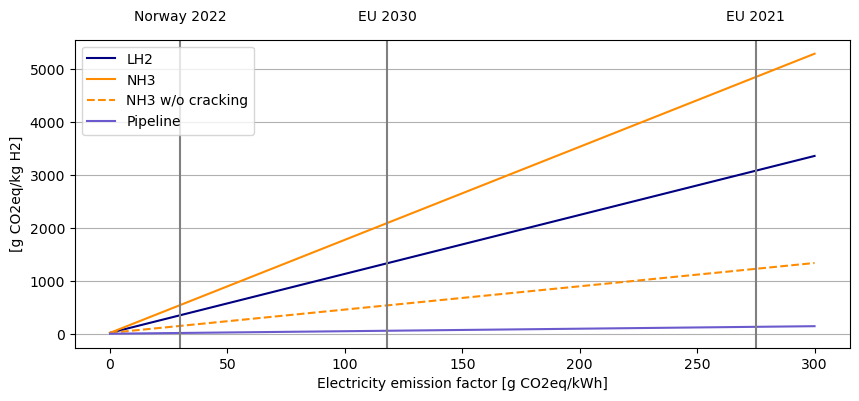

In [180]:
fig, ax = plt.subplots(figsize=(10,4))
#plt.subplot(1,2,1)


plt.plot(lh2_transport_sensi_EF, color='navy', linestyle='solid', label = 'LH2')
plt.plot(nh3_transport_sensi_EF, color='darkorange',linestyle='-', label = 'NH3')
plt.plot(nh3_transport_sensi_wo_recon, color='darkorange',linestyle='--', label = 'NH3 w/o cracking')
plt.plot(Pipeline_emissions_sensi_EF, color='slateblue',linestyle='-', label = 'Pipeline')

plt.axvline(x=30, color='grey', linestyle = '-')
plt.axvline(x=275, color='grey', linestyle = '-')
plt.axvline(x=118, color='grey', linestyle = '-')
plt.text(30,6000, 'Norway 2022', horizontalalignment='center', verticalalignment='center')
plt.text(275,6000, 'EU 2021', horizontalalignment='center', verticalalignment='center')
plt.text(118,6000, 'EU 2030', horizontalalignment='center', verticalalignment='center')

plt.grid(True, axis='y')
#plt.grid(True, axis='x')
ax.set_axisbelow(True)
plt.locator_params(axis='x', nbins=12)
plt.ylabel('[g CO2eq/kg H2]')
plt.xlabel('Electricity emission factor [g CO2eq/kWh]')
#plt.ylim(0,3000)
plt.legend(loc = 'upper left')



title = 'Transport_EF_sensi'
plt.savefig(path_plt + title + '.png', transparent=True)

plt.show()